In [2]:
# Importamos librerías de análisis de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import sys

import plotly.express as px
import plotly.graph_objects as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


from normalize_data import getNormalizedDataset

In [89]:
#Cargamos los dataframe
propiedades = getNormalizedDataset()

dfChangeRate = pd.read_csv('usd_mxc.csv', parse_dates=['Fecha'], dtype={'Último': float}, decimal=",")
dfChangeRate = dfChangeRate.drop(['Apertura', 'Máximo', 'Mínimo', '% var.'], axis=1)

(230396, 18)
(230060, 18)
(230041, 18)
(220417, 19)


In [90]:
propiedades.dtypes

titulo                                object
descripcion                           object
tipodepropiedad                     category
ciudad                              category
provincia                           category
antiguedad                           float64
habitaciones                         float64
garages                              float64
banos                                float64
metroscubiertos                      float64
metrostotales                        float64
fecha                         datetime64[ns]
gimnasio                                bool
usosmultiples                           bool
piscina                                 bool
escuelascercanas                        bool
centroscomercialescercanos              bool
precio                               float64
precio_m2                            float64
precio_dolar                         float64
extras                               float64
dtype: object

In [5]:
#Creo un nuevo dataframe que contengo solo la ciudad y el precio. Excluye los registros sin ciudad
precioPorProvincia = propiedades.dropna(subset=['provincia'])[['provincia', 'precio_dolar']]
precioPorProvincia = precioPorProvincia.groupby(['provincia']).mean()
precioPorProvinciaAsc = precioPorProvincia.sort_values(by=['precio_dolar'])

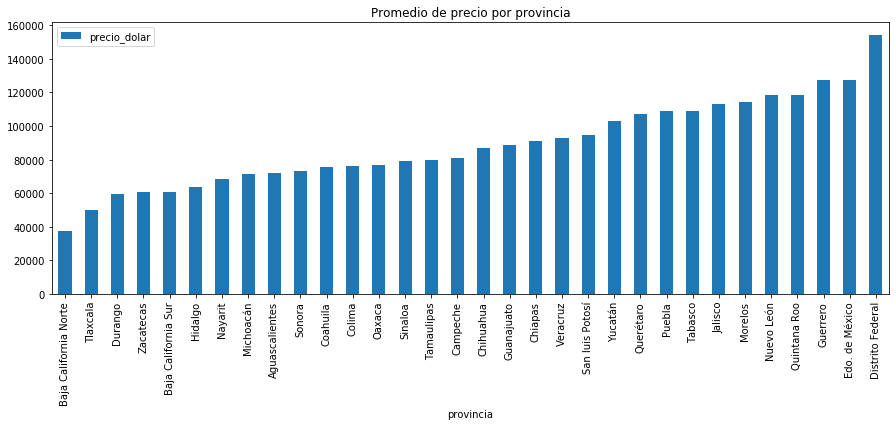

In [6]:
precioPorProvinciaAsc.plot(kind='bar', figsize=(15, 5), rot=90, 
                                       title="Promedio de precio por provincia");

In [7]:
def promedioPrecioPorCiudad(provincia):
    ciudadesPorProvincia = propiedades[['provincia', 'ciudad', 'precio_dolar']]
    ciudadesPorProvincia = ciudadesPorProvincia[ciudadesPorProvincia['provincia'] == provincia]

    ciudadesPorProvincia = ciudadesPorProvincia.groupby(['ciudad']).agg({'precio_dolar':'mean'})
    ciudadesPorProvincia = ciudadesPorProvincia.sort_values(by=['precio_dolar'])
    return ciudadesPorProvincia.head()

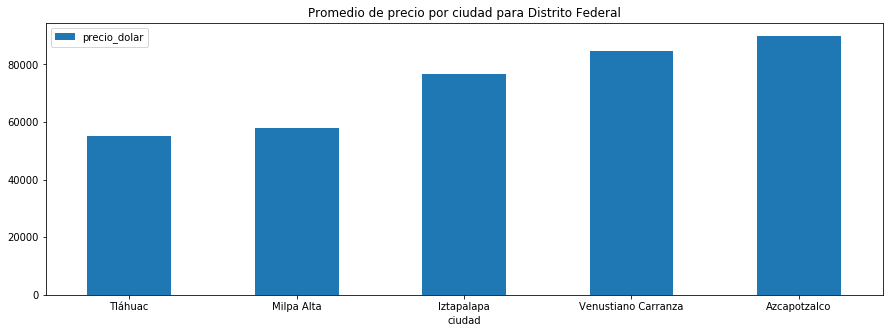

In [8]:
#Tomo 3 provincias que representen la mas cara, la mas barata y una media
promedioPrecioPorCiudad('Distrito Federal').plot(kind='bar', figsize=(15, 5), rot=0, 
                                       title="Promedio de precio por ciudad para Distrito Federal");

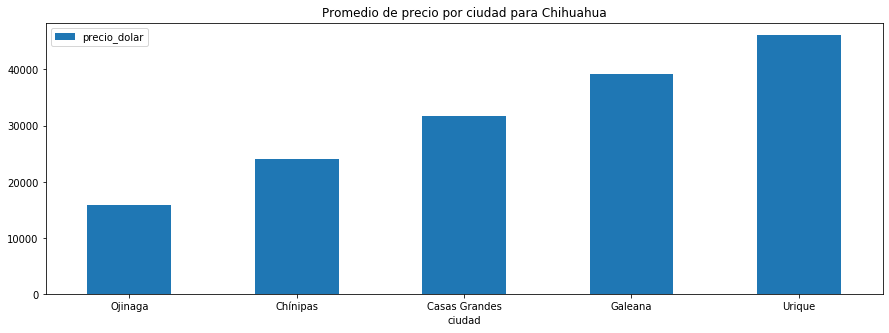

In [9]:
promedioPrecioPorCiudad('Chihuahua').plot(kind='bar', figsize=(15, 5), rot=0, 
                                       title="Promedio de precio por ciudad para Chihuahua");

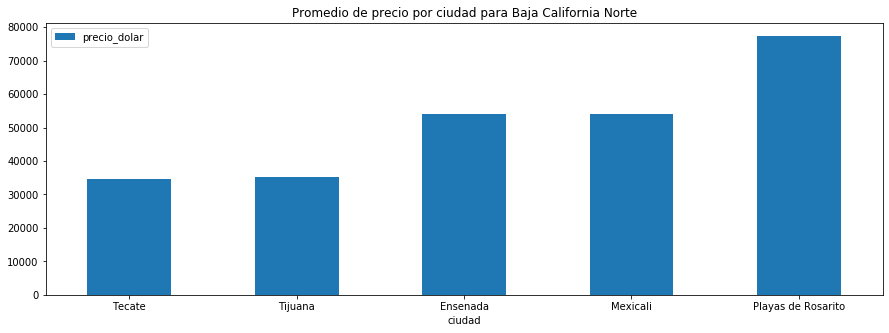

In [10]:
promedioPrecioPorCiudad('Baja California Norte').plot(kind='bar', figsize=(15, 5), rot=0, 
                                       title="Promedio de precio por ciudad para Baja California Norte");

In [51]:
#Creo dataframe que tenga como columnas tipoDePropiedad y los amenities
amenitiesPorPropiedad = propiedades[['tipodepropiedad','piscina','gimnasio', 'usosmultiples']]

#Calculo la media de cada amenitie por propiedad
amenitiesPorPropiedad = amenitiesPorPropiedad.groupby(['tipodepropiedad']).mean()
amenitiesPorPropiedad.dropna(inplace=True)

#Elimino los registros que tienen cero en algun amenitie, si no están en el grafico no tienen amenitie
#TODO: Improve filter method
#amenitiesPorPropiedad = amenitiesPorPropiedad.loc[lambda x: x['gimnasio'] != 0.000000, :].loc[lambda x: x['usosmultiples'] != 0.000000, :].loc[lambda x: x['piscina'] != 0.000000, :]
amenitiesPorPropiedad = amenitiesPorPropiedad[amenitiesPorPropiedad['gimnasio'] != 0.0]
amenitiesPorPropiedad = amenitiesPorPropiedad[amenitiesPorPropiedad['usosmultiples'] != 0.0]
amenitiesPorPropiedad = amenitiesPorPropiedad[amenitiesPorPropiedad['piscina'] != 0.0]
amenitiesPorPropiedad = amenitiesPorPropiedad.T * 100

In [72]:
print("Piscina por tipo de propiedad")
fig = go.Figure()
df = pd.DataFrame(dict(
    r=amenitiesPorPropiedad.loc['piscina'],
    theta=amenitiesPorPropiedad.columns))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()

Piscina por tipo de propiedad


In [13]:
print("Gimnasio por tipo de propiedad")
fig = go.Figure()
df = pd.DataFrame(dict(
    r=amenitiesPorPropiedad.loc['gimnasio'],
    theta=amenitiesPorPropiedad.columns))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()

Gimnasio por tipo de propiedad


In [14]:
print("Usosmultiples por tipo de propiedad")
fig = go.Figure()
df = pd.DataFrame(dict(
    r=amenitiesPorPropiedad.loc['usosmultiples'],
    theta=amenitiesPorPropiedad.columns))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()

Usosmultiples por tipo de propiedad


In [67]:
amenitiesPorProvincia = propiedades[['provincia','piscina','gimnasio','usosmultiples']]
amenitiesPorProvincia = amenitiesPorProvincia.groupby(['provincia']).mean() * 100

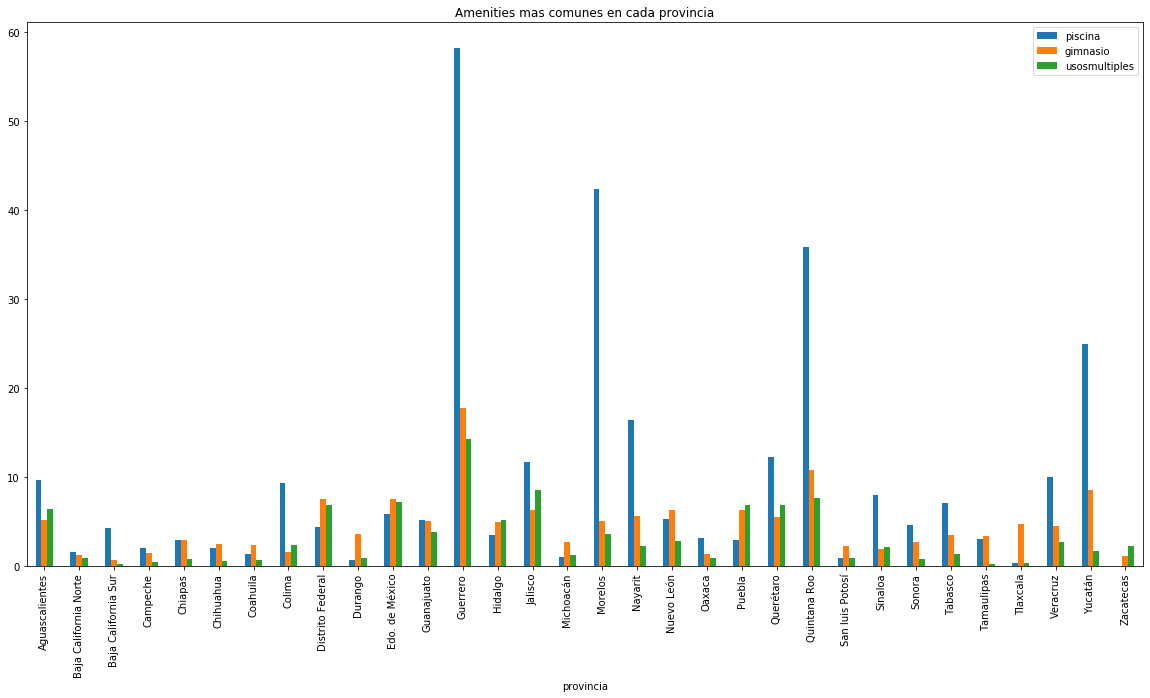

In [68]:
amenitiesPorProvincia.plot(kind='bar', figsize=(20, 10), rot=90, title="Amenities mas comunes en cada provincia");

In [79]:
#Relacion amenities por cantidad de habitaciones
amenitiesPorHabitaciones = propiedades[['habitaciones','piscina','gimnasio','usosmultiples']]
amenitiesPorHabitaciones = amenitiesPorHabitaciones.rename(columns={"habitaciones": "Propiedades(Por cantidad de habitaciones)"})
amenitiesPorHabitaciones = amenitiesPorHabitaciones.groupby(['Propiedades(Por cantidad de habitaciones)']).sum()

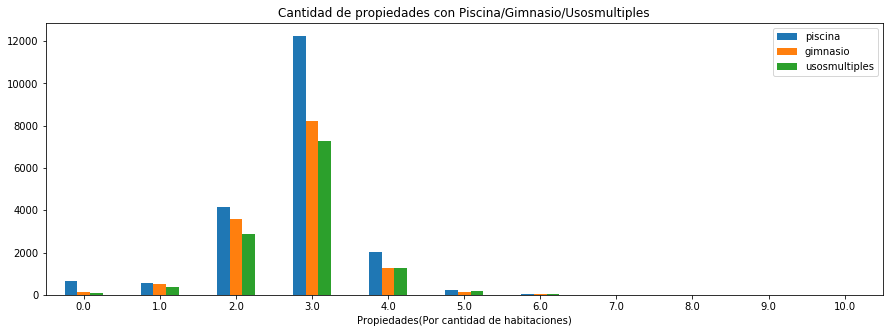

In [80]:
amenitiesPorHabitaciones.plot(kind='bar', figsize=(15, 5), rot=0, 
                                       title="Cantidad de propiedades con Piscina/Gimnasio/Usosmultiples");

In [ ]:
plt.figure(figsize=(10, 6))

sns.set(style='ticks', context='talk')

sns.stripplot(x='Propiedades por cantidad de habitaciones', y='Cantidad de amenities', data=df, order=['Apartamento','Casa','Edificio'], jitter=0.35)
sns.despine()

In [86]:
#Dentro de los departamentos de 3 ambientes que son los que mas amenities tienen, como varia el precio en relacion a los amenities? 
#Osea, si tiene 1 amenitie solo sale tanto, si tiene 2 sale tanto y si tiene 3 ?

amenitiesPorHabitaciones = propiedades[['habitaciones','piscina','gimnasio','usosmultiples', 'precio']]
amenitiesPorHabitaciones = amenitiesPorHabitaciones.rename(columns={"habitaciones": "Propiedades(Por cantidad de habitaciones)"})

propsNingunAmenitie = amenitiesPorHabitaciones.loc[lambda x: ~x['piscina'] & ~x['gimnasio'] & ~x['usosmultiples']]
propsNingunAmenitie = propsNingunAmenitie.groupby(['Propiedades(Por cantidad de habitaciones)']).mean()['precio'].to_frame()

propsUnAmenitie = amenitiesPorHabitaciones.loc[lambda x: x['piscina'] & ~x['gimnasio'] & ~x['usosmultiples'] \
                             | ~x['piscina'] & x['gimnasio'] & ~x['usosmultiples']
                             | ~x['piscina'] & ~x['gimnasio'] & x['usosmultiples'], :]
propsUnAmenitie = propsUnAmenitie.groupby(['Propiedades(Por cantidad de habitaciones)']).mean()['precio'].to_frame()

propsDosAmenitie = amenitiesPorHabitaciones.loc[lambda x: x['piscina'] & x['gimnasio'] & ~x['usosmultiples'] \
                             | x['piscina'] & ~x['gimnasio'] & x['usosmultiples']
                             | ~x['piscina'] & x['gimnasio'] & x['usosmultiples'], :]
propsDosAmenitie = propsDosAmenitie.groupby(['Propiedades(Por cantidad de habitaciones)']).mean()['precio'].to_frame()

propsTresAmenitie = amenitiesPorHabitaciones.loc[lambda x: x['piscina'] & x['gimnasio'] & x['usosmultiples']]
propsTresAmenitie = propsTresAmenitie.groupby(['Propiedades(Por cantidad de habitaciones)']).mean()['precio'].to_frame()

joined = propsNingunAmenitie.join(propsUnAmenitie, on='Propiedades(Por cantidad de habitaciones)', lsuffix='_sin_amenities', rsuffix='_un_amenitie')
joined = joined.join(propsDosAmenitie, on='Propiedades(Por cantidad de habitaciones)', lsuffix='_sin_amenities', rsuffix='_un_amenitie')
joined = joined.join(propsTresAmenitie, on='Propiedades(Por cantidad de habitaciones)', lsuffix='_dos_amenities', rsuffix='_tres_amenities')

#Se completan los nans con el valor obtenido de calcular el precio de la columna anterior mas la diferencia de ese con su anterior a la vez
joined["precio_dos_amenities"].fillna(joined["precio_un_amenitie"] + (joined["precio_un_amenitie"] - joined["precio_sin_amenities"]), inplace = True) 
joined["precio_tres_amenities"].fillna(joined["precio_dos_amenities"] + (joined["precio_dos_amenities"] - joined["precio_un_amenitie"]), inplace = True) 
joined = joined.rename(columns={"precio_sin_amenities": "Precio sin amenities", \
                                "precio_un_amenitie": "Precio con un amenitie", \
                                "precio_dos_amenities": "Precio con dos amenities", \
                                "precio_tres_amenities": "Precio con tres amenities"})


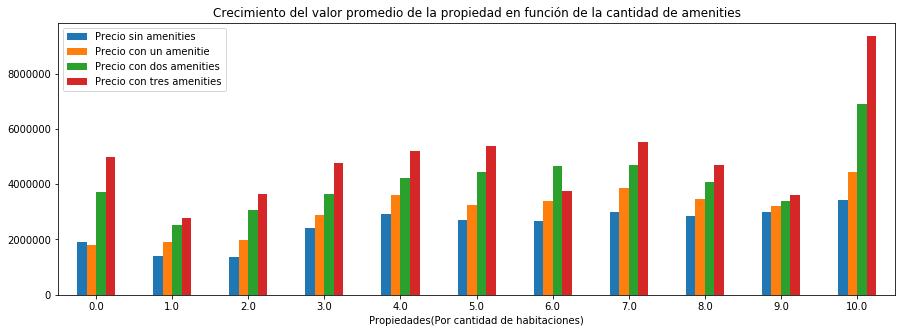

In [87]:
joined.plot(kind='bar', figsize=(15, 5), rot=0, 
                                       title="Crecimiento del valor promedio de la propiedad en función de la cantidad de amenities");

In [23]:
#Calculo el precio promedio del metro cuadrado por año
metroCuadradoPorAño = propiedades.copy()[['fecha', 'precio_m2']]
metroCuadradoPorAño.loc[:, 'año'] = metroCuadradoPorAño['fecha'].dt.year
metroCuadradoPorAño = metroCuadradoPorAño.groupby(['año']).agg({'precio_m2':'mean'})
metroCuadradoPorAño = metroCuadradoPorAño.sort_values(by=['año'])
metroCuadradoPorAño = metroCuadradoPorAño.reset_index()

In [24]:
#Calculo el precio promedio del dolar por año
dfChangeRate.loc[:, 'año'] = dfChangeRate['Fecha'].dt.year
dfChangeRate = dfChangeRate.groupby(['año']).agg({'Último':'mean'})
dfChangeRate = dfChangeRate.sort_values(by=['año'])
dfChangeRate = dfChangeRate.reset_index()

In [25]:
#Show 
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=metroCuadradoPorAño['año'], y=metroCuadradoPorAño['precio_m2'], name="Precio promedio metro cuadrado"),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(x=dfChangeRate['año'], y=dfChangeRate['Último'], name="Valor del dolar"),
    secondary_y=True,
)
fig.update_layout(
    title_text="Precio promedio por metro cuadrado vs Valor del dolar"
)
fig.update_xaxes(title_text="Años")

fig.update_yaxes(title_text="Precio promedio metro cuadrado", secondary_y=False)
fig.update_yaxes(title_text="Valor del dolar", secondary_y=True)

fig.show()

In [26]:
#import os
#import plotly
#import plotly.graph_objs as go
#import time
#from shutil import copyfile

#img_name = 'precio_m2_vs_dolar'
#dload = os.path.expanduser('~/Downloads')
#save_dir = '/tmp'

#plotly.offline.plot(fig, image_filename=img_name, image='png')

'temp-plot.html'